# Título del laboratorio: 
"Detección de anomalías mediante algoritmos de agrupación"
### Por Sebastian Medina Jimenez
## Objetivo: 
Comprender el concepto de detección de anomalías e implementar diferentes algoritmos de clustering para la detección de anomalías.

## Materiales:

Un ordenador con Python 3 y las siguientes librerías instaladas: scikit-learn, matplotlib, pandas.
Un conjunto de datos de uso común para la detección de anomalías, como el conjunto de datos de fraude con tarjetas de crédito (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).


## Punto 1

Comience por cargar el conjunto de datos de fraude con tarjetas de crédito en un marco de datos de pandas y realice un análisis exploratorio de datos (EDA) para familiarizarse con los datos. Realice tareas de preprocesamiento que considere necesarias. 


Se cargan las librerías necesarias  y el conjunto de datos


In [1]:
import pandas as pd
import numpy as np
DF = pd.read_csv("/Users/jhoan.medina/Documents/U/T1/creditcard.csv")

In [3]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


La base de datos consta de 31 columas y 284807 filas donde no hay datos faltandes como se puede ver en  la siguiente salida

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Dado que la variable Time representa el nímero de segundos entre la primer transacción y la transacción n, se elimina pues puede generar ruido en el análisis y no representta información importante para el problema

In [5]:
DF=DF.drop("Time",axis = 1)

### Análisis variables explicativas
Dado que las variables V (menos Value) provienen de un PCA no tiene sentido entrar a ver detalles de las mismas dado que no sabemos la interpretación de las mismas. Se puede observar que Amount (Cantidad de la transacción) no está escalada

In [6]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
DF.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Para poder observar la naturaleza de las variables se hace un histograma delas mismas dodne se puede evidenciar no hay aparentemente no hay concentraciones de valores atípcos

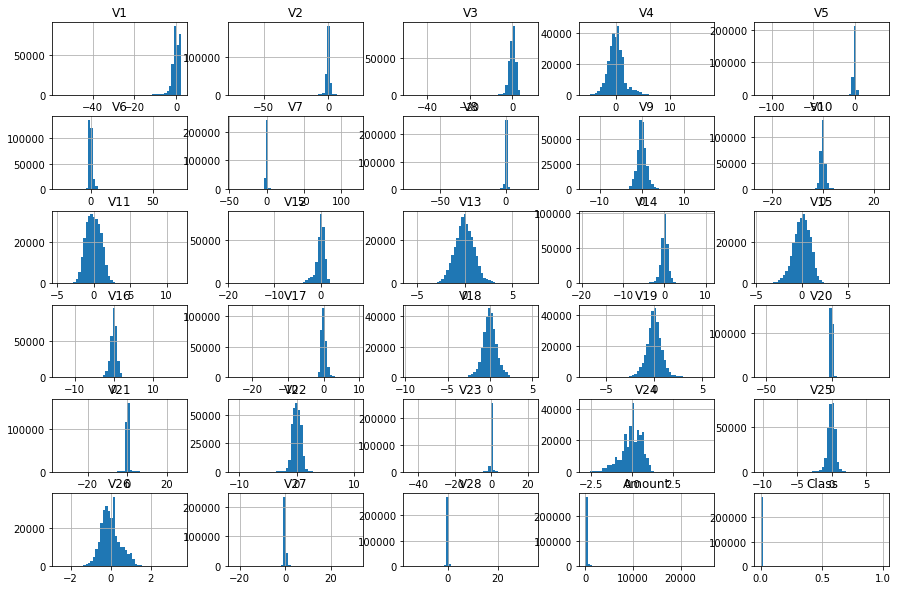

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
DF.hist(bins=50, figsize=(15,10))
plt.show()

Para poder ver la relación entre las diferentes variables se hace un plot de la matriz de correlación donde se puede ver que las variables V provenientes del PCA no tienen correlación significativa, mientras que para la variable Amount existe una relación "media" con las variables V2,V1,V3,V6,V7 y V20

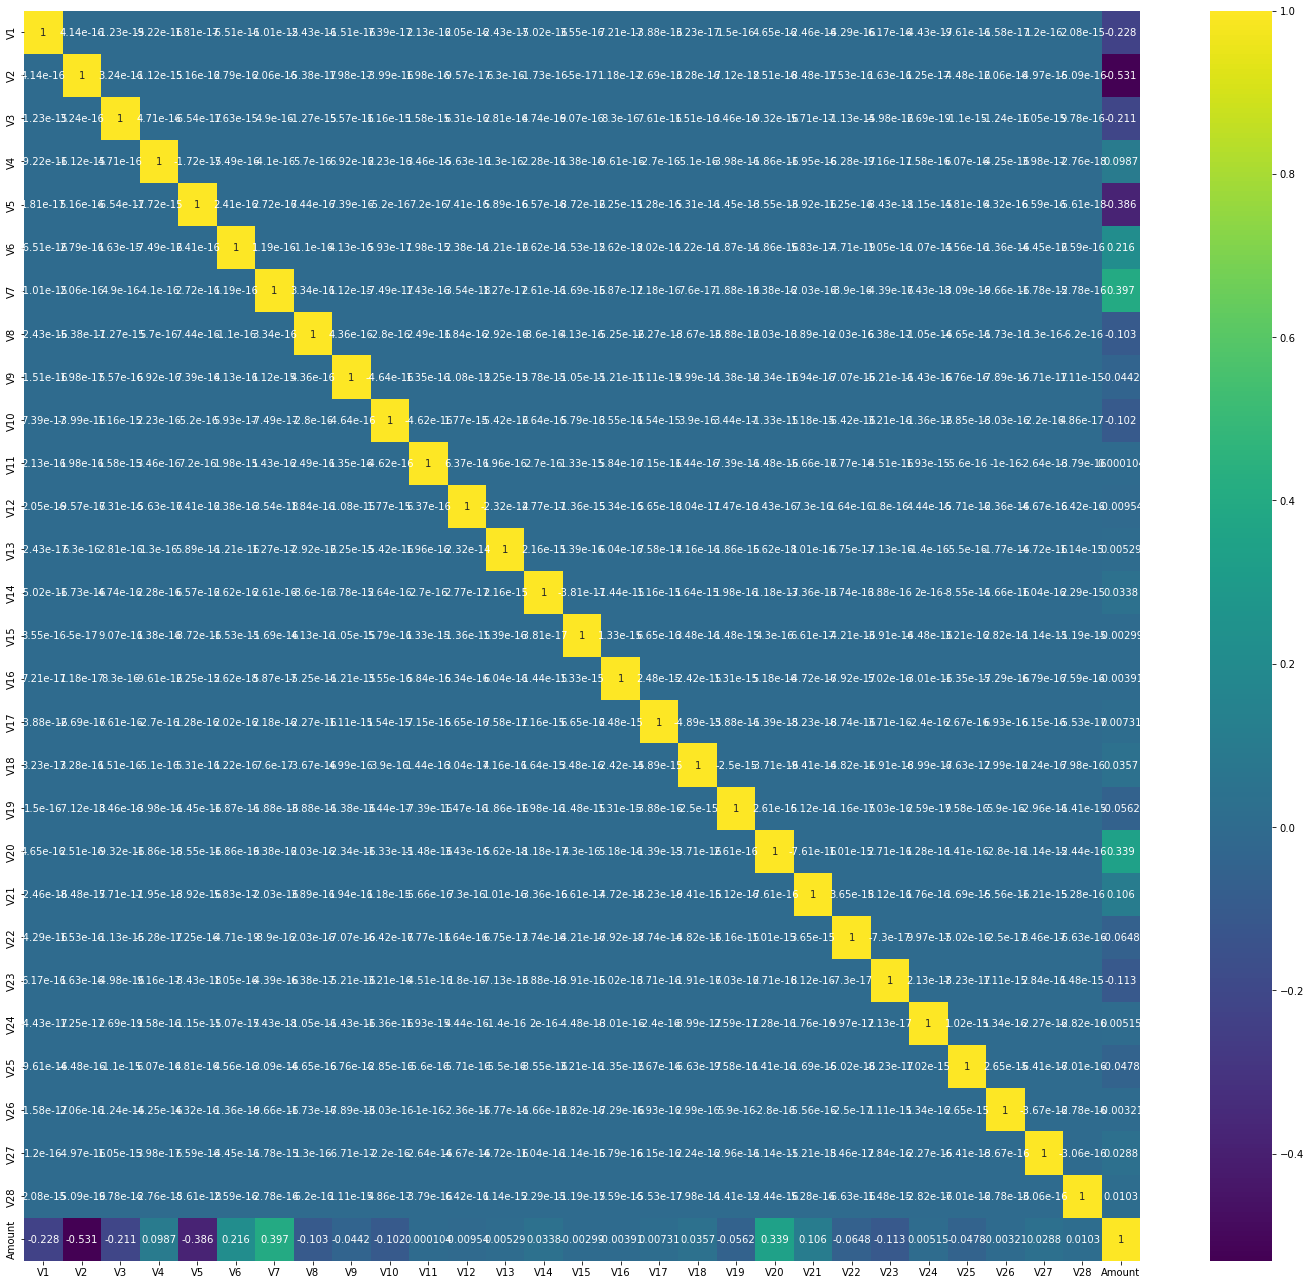

In [8]:
plt.figure(figsize=(25,23))
sns.heatmap(DF.drop("Class",axis = 1).corr(), annot=True, cmap='viridis', fmt='.3g')
plt.show()

### Análisis variable respuesta
Se puede ver que hay 284315 datos para transacciones no fraudulentas mientras que sólo 492 para tansacciones fraudulentas, lo cual supone un problema pues los tados están desbalanceados

In [9]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

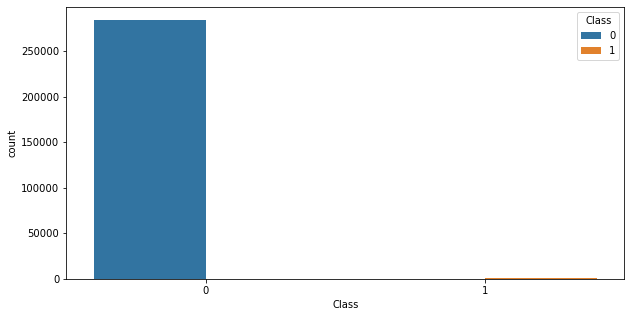

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', hue='Class', data=DF)
plt.show()

# Punto 2

Aplicar diferentes algoritmos de clustering, como K-Means, Density-Based Clustering (DBSCAN), Gaussian Mixture Model (GMM), y otros algoritmos de detección de anomalìas en el conjunto de datos de fraude con tarjetas de crédito.

El siguiente pipeline se ha hecho para procesar los datos, dado que las variables son numéricas y no hay datos faltantes el pipeline solo escalará los datos

In [12]:

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


numerical = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
            'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
            'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
def build_pipeline(numerical):
    """ Pipeline to pre process
    
    Returns: a pipeline
    """
    numeric_transformer = Pipeline(
        steps=[ ("scaler", StandardScaler())]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numerical)
            ]
    )
    pipe = Pipeline(
    steps=[("preprocessor", preprocessor)]
    )

    return pipe

 Se procede a escalar los datos

In [13]:
pipe_pre_process = build_pipeline(numerical)
PROCESSED_DF = pipe_pre_process.fit_transform(DF)

Se procede a hacer el ajuste delos algoritmos propuestos
## K-means

In [14]:
from sklearn.cluster import KMeans
elbow = {k : KMeans(n_clusters = k, random_state=1).fit(PROCESSED_DF) for k in range(1,30)}
import matplotlib.pyplot as plt
def plot_elbow(kmeans_dict, elbow=None, w=11, h=5):
    plt.figure(figsize = (w,h))
    if elbow is not None:
        plt.axvline(x=elbow, linestyle='-.', c="black")
    plt.plot(kmeans_dict.keys(), [km.inertia_ for km in kmeans_dict.values()], '-o');
    ax = plt.gca()
    ax.tick_params('both', labelsize=(w+h)/2)
    ax.set_xlabel('K', fontsize=w)
    ax.set_ylabel("Inertia", fontsize=w)

Se puede observar que con 15 clusters  la inercia deja de tener una pendiente tan pronunciada y dado que entre más grupos puede ser más difícil en análisis

6446917.651434273

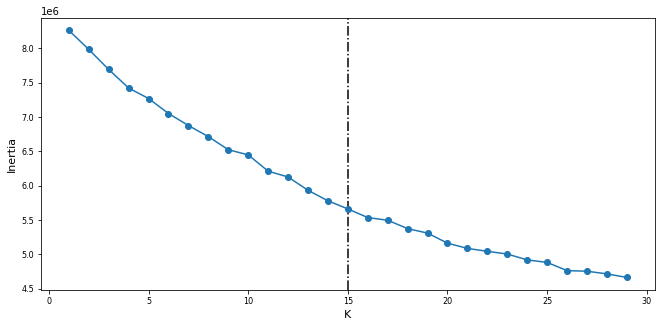

In [15]:
plot_elbow(elbow, elbow=15)
elbow[10].inertia_

In [16]:
kmeans = KMeans(n_clusters=15, random_state=1)
kmeans.fit(PROCESSED_DF)

KMeans(n_clusters=15, random_state=1)

Al hacer el plot de las 2 componentes principales  se puede evidenciar que el clustering no logra hacer una división tan  clara de los clusters

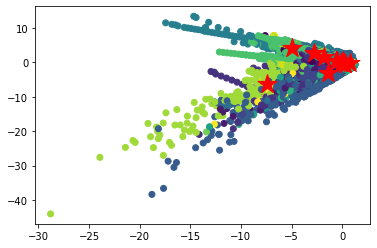

In [17]:
clusters = kmeans.predict(PROCESSED_DF)
PROCESSED_DF2 = pd.DataFrame(PROCESSED_DF)
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', c="r", s=400)

In [31]:
PROCESSED_DF2["KMEANS"] = clusters

## DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3)
dbscan.fit(PROCESSED_DF)
clusters_dbscan = dbscan.labels_


Para este algoritmo se tiene que una clase tiene la mayoría de los datos, por lo que en el análisis de las anomalías  se estudiará si se lograron detectar las anomalías

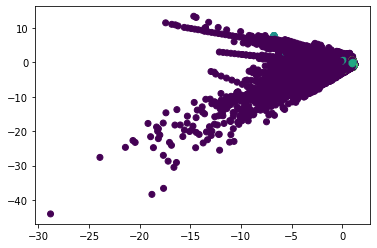

In [21]:
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=clusters_dbscan)


In [ ]:
PROCESSED_DF2["DBSCAN"] = clusters_dbscan

## GMM

In [22]:
from sklearn.mixture import GaussianMixture
gmm_clusters = GaussianMixture(n_components=15, random_state=0).fit(PROCESSED_DF).predict(PROCESSED_DF)

Para lograr hacer comparable el ejercicio se ha usado el método GMM con 15 clusters

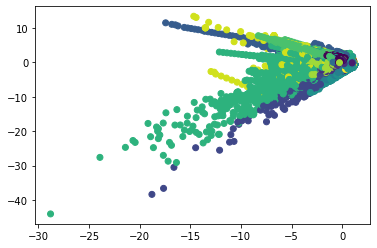

In [24]:
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=gmm_clusters)


In [ ]:
PROCESSED_DF2["GMM"] = gmm_clusters


## Isolation Forest (Nuevo algoritmo)

In [25]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(PROCESSED_DF)
isolation_anomaly = clf.predict(PROCESSED_DF)

En este algoritmo está hecho para detectar anomalías, donde los datos atípicos son flaggeados con un -1

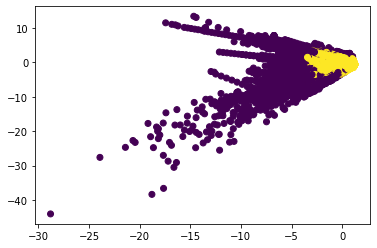

In [37]:
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=isolation_anomaly)

In [26]:
PROCESSED_DF2["ISOLATION"] = isolation_anomaly
PROCESSED_DF2["ISOLATION"].value_counts()

 1    274228
-1     10579
Name: ISOLATION, dtype: int64

# Punto 3

Utilice los resultados de la agrupación para identificar transacciones anómalas.

In [33]:
PROCESSED_DF2["Original"] = DF.Class

### DBSCAN e Isolation forest

Para los algoritmos DBSCAN e ISOLATION forest no hay que hacer nada  pues las anomalías quedan en el grupo -1 pero para GMM y Kmeans  hay que identificar si en algún grupo quedaron las anómalas

### GMM
Para GMM se procede a hacer una tabla dee contingencia de las etiquetas originales de fraude y los clusters obtenidos

In [38]:
PROCESSED_DF2[["Original","GMM"]].value_counts()

Original  GMM
0         6      69561
          0      47808
          2      36293
          7      22607
          12     22055
          1      18705
          14     16928
          11     12511
          10     12400
          8       7553
          5       7180
          9       4151
          3       3669
          4       1645
          13      1249
1         4        316
          13        85
          8         25
          0         11
          1         11
          14        10
          12         7
          11         6
          2          6
          6          5
          3          5
          9          3
          7          1
          10         1
dtype: int64

Se puede identificar que las observaciones anomalas quedaron repartidas en varios grupos  y que  no logran diferenciarse por tanto el algoritmo no resulta tan util en esta implementación

### K means
De igual manera se hace la misma tabla de contingencia paralos resultados del kmeans

In [36]:
PROCESSED_DF2[["Original","KMEANS"]].value_counts()

Original  KMEANS
0         14        62394
          3         54772
          9         30492
          2         26009
          8         20866
          5         18756
          11        17804
          7         16523
          0         16288
          1         12364
          4          3435
          10         2877
          13         1327
          12          368
1         6           203
          5           145
0         6            40
1         3            33
          2            30
          11           20
          0            13
          13           13
          14           11
          1             8
          4             8
          8             5
          9             3
dtype: int64

El cluster 6 de Kmeans tiene unicamente transacciones fraudulentas, otra gran parte la tiene el cluster 5 pero este cluster si tiene tansacciones no fraudulentas por tanto el cluster 6 serían las transacciones fraudulentas

# Punto 4
Visualice los resultados de cada algoritmo de agrupación mediante diagramas de dispersión y compárelos con las etiquetas de clase reales (fraude frente a no fraude).


## K-means 

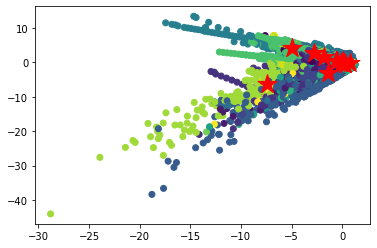

In [39]:
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', c="r", s=400)

El cluster 6 de Kmeans tiene unicamente transacciones fraudulentas, otra gran parte la tiene el cluster 5 pero este cluster si tiene tansacciones no fraudulentas por tanto el cluster 6 serían las transacciones fraudulentas

In [43]:
PROCESSED_DF2[["Original","KMEANS"]].value_counts()

Original  KMEANS
0         14        62394
          3         54772
          9         30492
          2         26009
          8         20866
          5         18756
          11        17804
          7         16523
          0         16288
          1         12364
          4          3435
          10         2877
          13         1327
          12          368
1         6           203
          5           145
0         6            40
1         3            33
          2            30
          11           20
          0            13
          13           13
          14           11
          1             8
          4             8
          8             5
          9             3
dtype: int64

## DBSCAN

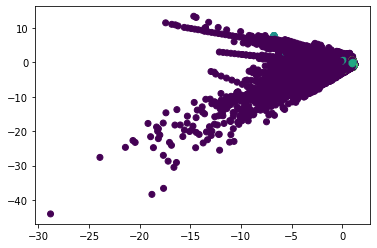

In [40]:
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=clusters_dbscan)


El algoritmo DBSCAN  identifica como anomalías la mayoría de los datos y es poco fiable para este problema 

In [46]:
PROCESSED_DF2[["Original","DBSCAN"]].value_counts()

Original  DBSCAN
0         -1        226397
           1491       1554
           1477        992
           1493        940
           1515        774
                     ...  
1          1196          1
0          2535          1
1          870           1
0          857           1
1          2052          1
Length: 2647, dtype: int64

### GMM

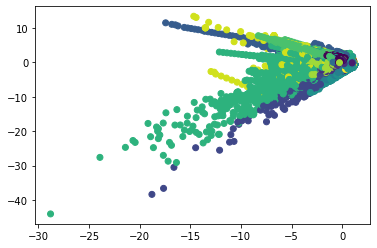

In [41]:
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=gmm_clusters)


Se puede identificar que las observaciones anomalas quedaron repartidas en varios grupos  y que  no logran diferenciarse por tanto el algoritmo no resulta tan util en esta implementación


In [45]:
PROCESSED_DF2[["Original","GMM"]].value_counts()

Original  GMM
0         6      69561
          0      47808
          2      36293
          7      22607
          12     22055
          1      18705
          14     16928
          11     12511
          10     12400
          8       7553
          5       7180
          9       4151
          3       3669
          4       1645
          13      1249
1         4        316
          13        85
          8         25
          0         11
          1         11
          14        10
          12         7
          11         6
          2          6
          6          5
          3          5
          9          3
          7          1
          10         1
dtype: int64

### Isolation Forest

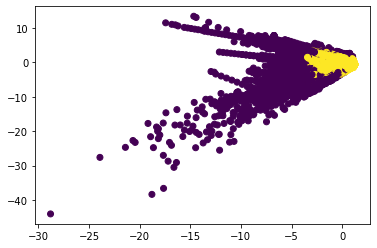

In [42]:
plt.scatter(PROCESSED_DF2.iloc[:,0], PROCESSED_DF2.iloc[:,1], c=isolation_anomaly)

In [47]:
PROCESSED_DF2[["Original","ISOLATION"]].value_counts()

Original  ISOLATION
0          1           274146
          -1            10169
1         -1              410
           1               82
dtype: int64

Finalmente para el algoritmo isolation forest  identifica el 83% de las  anomalías  pero se detectan más transacciones

# Punto 5
Discutir los pros y los contras de cada algoritmo y hacer recomendaciones sobre qué algoritmo es el más adecuado para este conjunto de datos específico.



#### K means
Logra identifical el 42% de las transacciones fraudulentas
#### DBSCAN 
No logra identificar bien las anomalías
#### GMM
No hay un grupo que concentre las anomalías
#### Isolation forest
Dado que es un algoritmo que específicamente encuentra anomalías logra captar el 83% de los casos de fraude

A modo de conclusión el mejor algoritmo es el Isolation forest  para identificación de atipicidades y se puede ver que los algoritmos  de clustering no performan de la mejor manera para detectar fraude y que en definitva se deben usar algoritmos de clasificación sobre las observaciones que son categorizadas como fraudulentas  y entrenar modelos de clasificación




# Punto 6

Evaluar el rendimiento de cada algoritmo utilizando parámetros como la precisión, la recuperación y la puntuación F1.

In [52]:
PROCESSED_DF2["DBSCAN_FLAG"] = np.where(PROCESSED_DF2["DBSCAN"]==-1, 1 ,0 )
PROCESSED_DF2["ISOLATION_FLAG"] = np.where(PROCESSED_DF2["ISOLATION"]==-1, 1 ,0 )
PROCESSED_DF2["KMEANS_FLAG"] = np.where(PROCESSED_DF2["KMEANS"]==6, 1 ,0 )

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [56]:
print("Kmeans summary")
print(f"Precision : {precision_score(PROCESSED_DF2.Original,PROCESSED_DF2.KMEANS_FLAG)}")
print(f"Recall : {recall_score(PROCESSED_DF2.Original,PROCESSED_DF2.KMEANS_FLAG)}")
print(f"F1 score : {f1_score(PROCESSED_DF2.Original,PROCESSED_DF2.KMEANS_FLAG)}")

Kmeans summary
Precision : 0.8353909465020576
Recall : 0.41260162601626016
F1 score : 0.5523809523809524


In [57]:
print("Isolation forest summary")
print(f"Precision : {precision_score(PROCESSED_DF2.Original,PROCESSED_DF2.ISOLATION_FLAG)}")
print(f"Recall : {recall_score(PROCESSED_DF2.Original,PROCESSED_DF2.ISOLATION_FLAG)}")
print(f"F1 score : {f1_score(PROCESSED_DF2.Original,PROCESSED_DF2.ISOLATION_FLAG)}")

Isolation forest summary
Precision : 0.03875602608942244
Recall : 0.8333333333333334
F1 score : 0.0740673832535453


In [58]:
print("DBSCAN summary")
print(f"Precision : {precision_score(PROCESSED_DF2.Original,PROCESSED_DF2.DBSCAN_FLAG)}")
print(f"Recall : {recall_score(PROCESSED_DF2.Original,PROCESSED_DF2.DBSCAN_FLAG)}")
print(f"F1 score : {f1_score(PROCESSED_DF2.Original,PROCESSED_DF2.DBSCAN_FLAG)}")

DBSCAN summary
Precision : 0.002128878702397743
Recall : 0.9817073170731707
F1 score : 0.004248544235877769


## Resultados esperados:

1- Código para cargar y preprocesar el conjunto de datos de fraude con tarjetas de crédito.

2- Código para aplicar cada algoritmo de clustering para la detección de anomalías

3- Código para evaluar el rendimiento de cada algoritmo mediante precisión, recuperación y puntuación F1. 

4- Un informe resumiendo los resultados, incluyendo gráficos de dispersión y discusión de los pros y contras de cada algoritmo.